# Hospital Appointment

### Content

This dataset collects information from 100k medical appointments and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row as below

### Dictionary
- PatientId: Identification of a patient
- AppointmentID: Identification of each appointment
- Gender: Male or Female
- AppointmentDay: The day of the actual appointment, when they have to visit the doctor.
- BookingDay: The day someone called or registered the appointment, this is before appointment of course.
- Age: How old is the patient.
- Neighbourhood: Where the appointment takes place.
- Scholarship: Yes or None
- Hypertension: Yes or None
- Diabetes: Yes or None
- Alcoholism: Yes or None
- Handcap: Yes or None
- SMS_received: Yes or No.
- No-show: Yes or No

### Goal
- Which day of the week has the highest number of no-shows?
- Does the time between the scheduling day and the appointment day affect whether a patient shows up or not?
- Does receiving an SMS affect attendance?
- Which age groups and gender have the highest no-show rates?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner notebook presentation
import warnings
warnings.filterwarnings('ignore')

### Load and review file

In [2]:
#read file
hospital_appointments = pd.read_csv("Hopsital Appointments.csv")

In [3]:
hospital_appointments.head()

,PatientId,AppointmentID,Gender,AppointmentDay,BookingDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
hospital_appointments.shape

(110527, 14)

In [5]:
hospital_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   AppointmentDay  110527 non-null  object 
 4   BookingDay      110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
hospital_appointments.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
AppointmentDay    0
BookingDay        0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
hospital_appointments.duplicated().sum()

0

In [8]:
hospital_appointments.drop_duplicates(inplace=True)

In [9]:
hospital_appointments.duplicated().sum()

0

In [10]:
#checking unique values in different variables
unique_values = {}
for col in hospital_appointments.columns:
    unique_values[col] = hospital_appointments[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
PatientId,61744
AppointmentID,110527
Gender,2
AppointmentDay,103549
BookingDay,27
Age,104
Neighbourhood,81
Scholarship,2
Hypertension,2
Diabetes,2


In [11]:
# Check unique values in the 'Handcap' column
unique_handcap_values = hospital_appointments['Handcap'].unique()
print("Unique values in the 'Handcap' column:", unique_handcap_values)


Unique values in the 'Handcap' column: [0 1 2 3 4]


In [12]:
# Checking the value counts of each feature
for col in hospital_appointments:
  print(hospital_appointments[col].value_counts())
  print("-" * 50)

8.221460e+14    88
9.963767e+10    84
2.688610e+13    70
3.353480e+13    65
2.584240e+11    62
                ..
2.367500e+11     1
1.744680e+14     1
7.978390e+12     1
5.595420e+13     1
1.557660e+13     1
Name: PatientId, Length: 61744, dtype: int64
--------------------------------------------------
5642903    1
5692618    1
5687640    1
5740664    1
5740598    1
          ..
5718442    1
5426425    1
5424230    1
5720832    1
5629448    1
Name: AppointmentID, Length: 110527, dtype: int64
--------------------------------------------------
F    71840
M    38687
Name: Gender, dtype: int64
--------------------------------------------------
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-05-16T09:10:04Z     1
2016-05-09T10:17:48Z     1
2016-04-27T13:30:56Z     1
Name: AppointmentDay, Length: 103549, dtype: int64
---

In [13]:
# Replace 0 with 'None' and all other values with 'Yes'
hospital_appointments['Handcap'] = hospital_appointments['Handcap'].apply(lambda x: 'None' if x == 0 else 'Yes')

# Verify the changes
print(hospital_appointments['Handcap'].value_counts())


None    108286
Yes       2241
Name: Handcap, dtype: int64


In [14]:
# Convert the relevant columns (0 -> No, 1 -> Yes)
columns_to_convert = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received']
for column in columns_to_convert:
    hospital_appointments[column] = hospital_appointments[column].replace({0: 'No', 1: 'Yes'})

In [15]:
#Sanity Check
hospital_appointments.head(2)

,PatientId,AppointmentID,Gender,AppointmentDay,BookingDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,None,No,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,None,No,No


In [16]:
hospital_appointments.describe()

,PatientId,AppointmentID,Age
count,1.105270e+05,1.105270e+05,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874
std,2.560949e+14,7.129575e+04,23.110205
min,3.921800e+04,5.030230e+06,-1.000000
25%,4.172615e+12,5.640286e+06,18.000000
50%,3.173180e+13,5.680573e+06,37.000000
75%,9.439170e+13,5.725524e+06,55.000000
max,9.999820e+14,5.790484e+06,115.000000


In [17]:
# Convert the AppointmentDay column to datetime with UTC handling
hospital_appointments['AppointmentDay'] = pd.to_datetime(hospital_appointments['AppointmentDay'], utc=True)

# Extract the day of the week and time
hospital_appointments['DayOfWeek'] = hospital_appointments['AppointmentDay'].dt.day_name()
hospital_appointments['AppointmentTime'] = hospital_appointments['AppointmentDay'].dt.time

# Output the first few rows to verify
print(hospital_appointments[['AppointmentDay', 'DayOfWeek', 'AppointmentTime']].head())

             AppointmentDay DayOfWeek AppointmentTime
0 2016-04-29 18:38:08+00:00    Friday        18:38:08
1 2016-04-29 16:08:27+00:00    Friday        16:08:27
2 2016-04-29 16:19:04+00:00    Friday        16:19:04
3 2016-04-29 17:29:31+00:00    Friday        17:29:31
4 2016-04-29 16:07:23+00:00    Friday        16:07:23


In [18]:
hospital_appointments.head(2)

,PatientId,AppointmentID,Gender,AppointmentDay,BookingDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DayOfWeek,AppointmentTime
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,None,No,No,Friday,18:38:08
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,None,No,No,Friday,16:08:27


In [19]:
# Determine which day has the most appointments
appointments_by_day = hospital_appointments['DayOfWeek'].value_counts()
print("Appointments by Day of the Week:")
print(appointments_by_day)

Appointments by Day of the Week:
Tuesday      26168
Wednesday    24262
Monday       23085
Friday       18915
Thursday     18073
Saturday        24
Name: DayOfWeek, dtype: int64


In [20]:
# If time is available, determine which time has the most appointments
if 'AppointmentTime' in hospital_appointments.columns:
    appointments_by_time = hospital_appointments['AppointmentTime'].value_counts().head()
    print("\nMost Frequent Appointment Times:")
    print(appointments_by_time)


Most Frequent Appointment Times:
07:09:54    31
07:09:53    26
17:17:46    24
07:52:31    22
17:18:27    22
Name: AppointmentTime, dtype: int64


## Visualisations

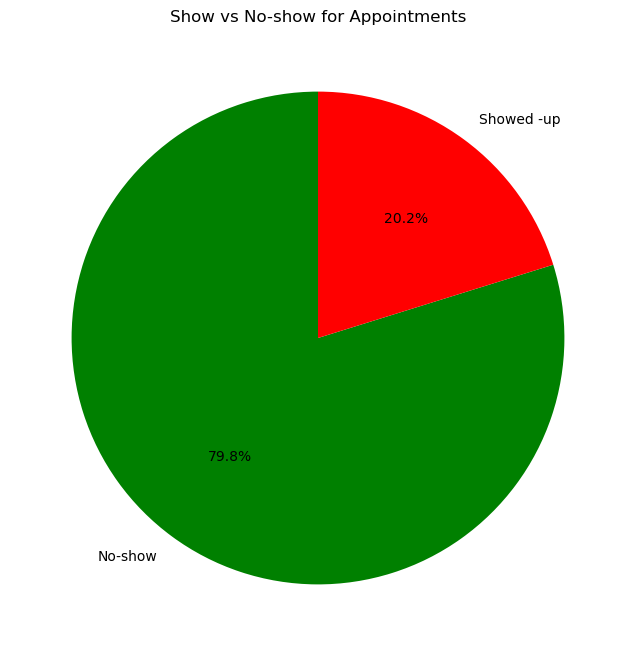

In [21]:
# Count the number of people who showed up vs. those who didn't
no_show_data = hospital_appointments['No-show'].value_counts()

# Prepare labels and data for the pie chart
labels = ['No-show', 'Showed -up']
data = [no_show_data['No'], no_show_data['Yes']]  # 'No' means showed up, 'Yes' means did not show up

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.title('Show vs No-show for Appointments')
plt.show()

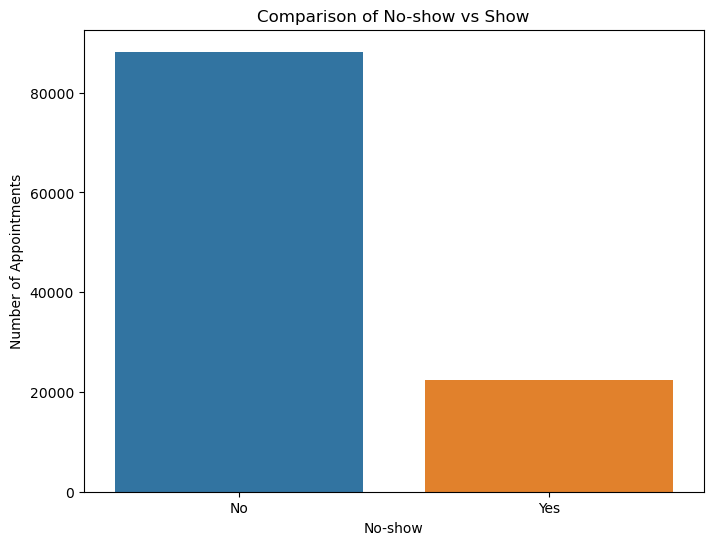

In [22]:
# 4. No-show vs Show Comparison
plt.figure(figsize=(8, 6))
sns.countplot(data=hospital_appointments, x='No-show')
plt.title('Comparison of No-show vs Show')
plt.ylabel('Number of Appointments')
plt.show()


In [23]:
# Verify the changes
print(hospital_appointments['Gender'].value_counts())

F    71840
M    38687
Name: Gender, dtype: int64


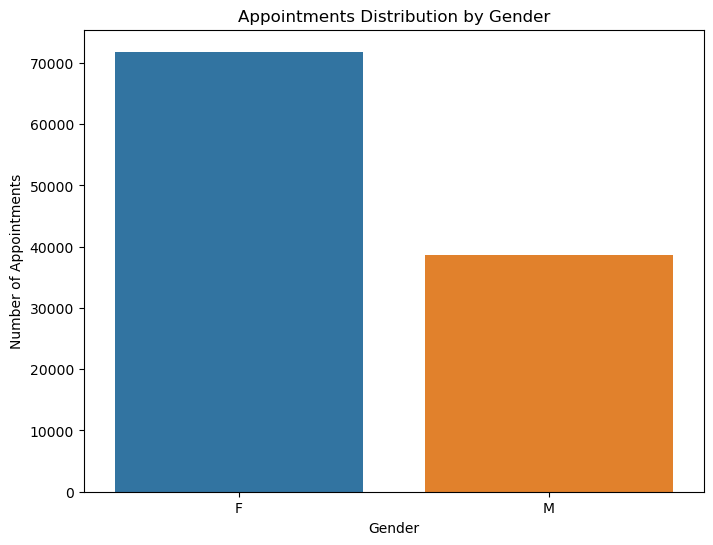

In [24]:
# 2. Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=hospital_appointments, x='Gender')
plt.title('Appointments Distribution by Gender')
plt.ylabel('Number of Appointments')
plt.show()

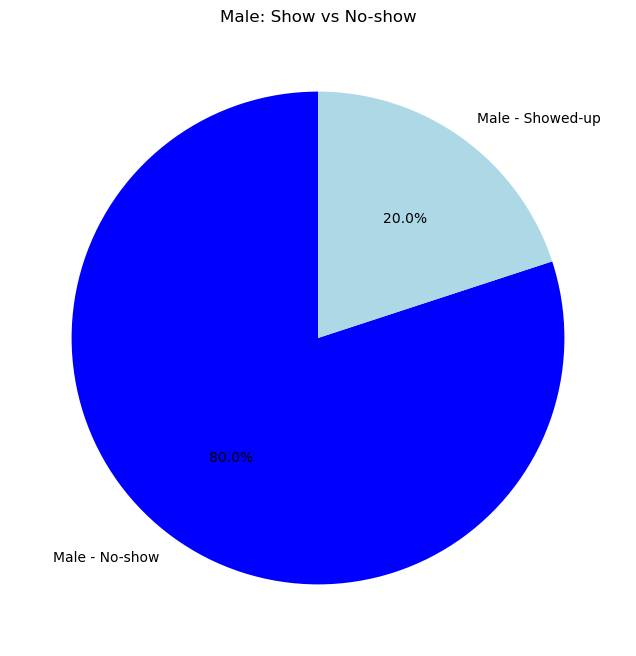

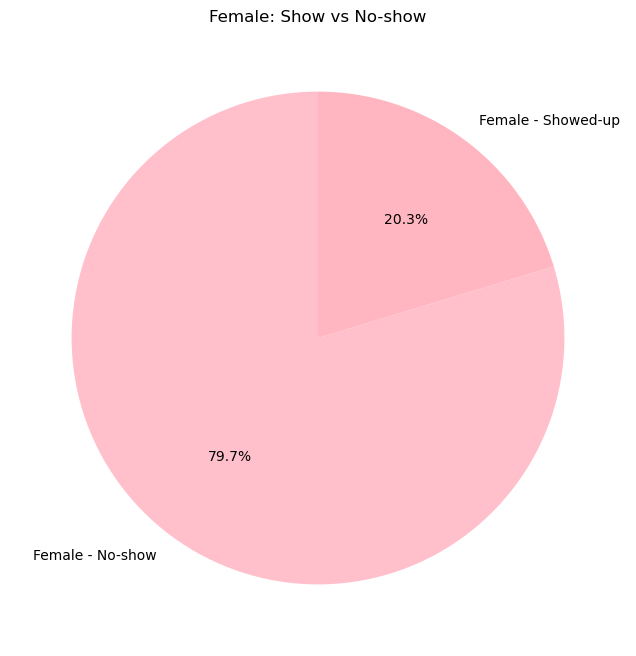

In [25]:
# Group the data by Gender and No-show status
gender_no_show_data = hospital_appointments.groupby(['Gender', 'No-show']).size().unstack()

# Plot pie charts for males and females separately

# Pie chart for males
plt.figure(figsize=(8, 8))
male_data = [gender_no_show_data.loc['M', 'No'], gender_no_show_data.loc['M', 'Yes']]  # Male: Showed up vs No-show
male_labels = ['Male - No-show', 'Male - Showed-up']
plt.pie(male_data, labels=male_labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'lightblue'])
plt.title('Male: Show vs No-show')
plt.show()

# Pie chart for females
plt.figure(figsize=(8, 8))
female_data = [gender_no_show_data.loc['F', 'No'], gender_no_show_data.loc['F', 'Yes']]  # Female: Showed up vs No-show
female_labels = ['Female - No-show', 'Female - Showed-up']
plt.pie(female_data, labels=female_labels, autopct='%1.1f%%', startangle=90, colors=['pink', 'lightpink'])
plt.title('Female: Show vs No-show')
plt.show()

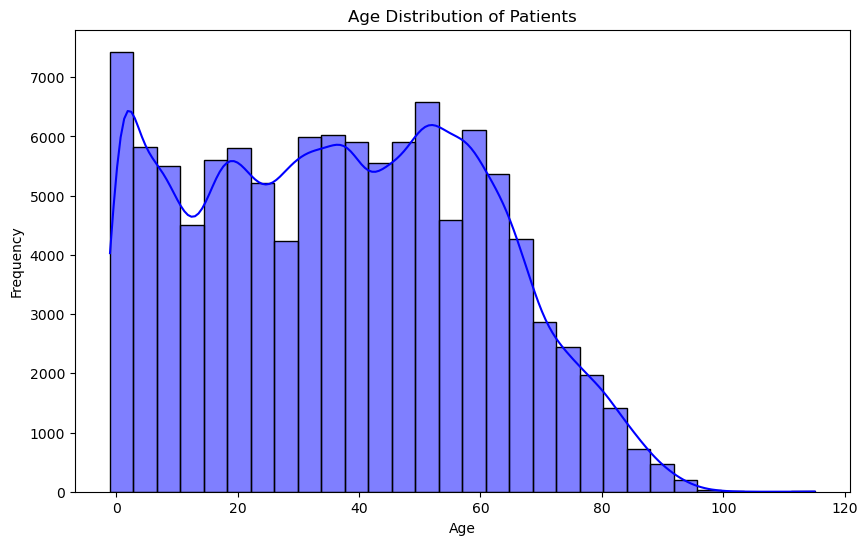

In [26]:
# 3. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(hospital_appointments['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

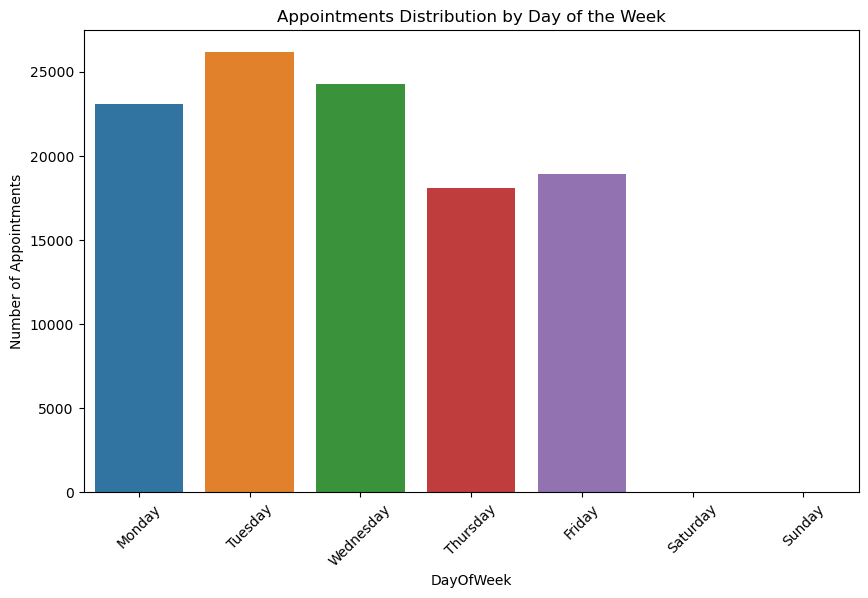

In [27]:
# 1. Distribution of Appointments by Day of the Week
plt.figure(figsize=(10, 6))
sns.countplot(data=hospital_appointments, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Appointments Distribution by Day of the Week')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.show()

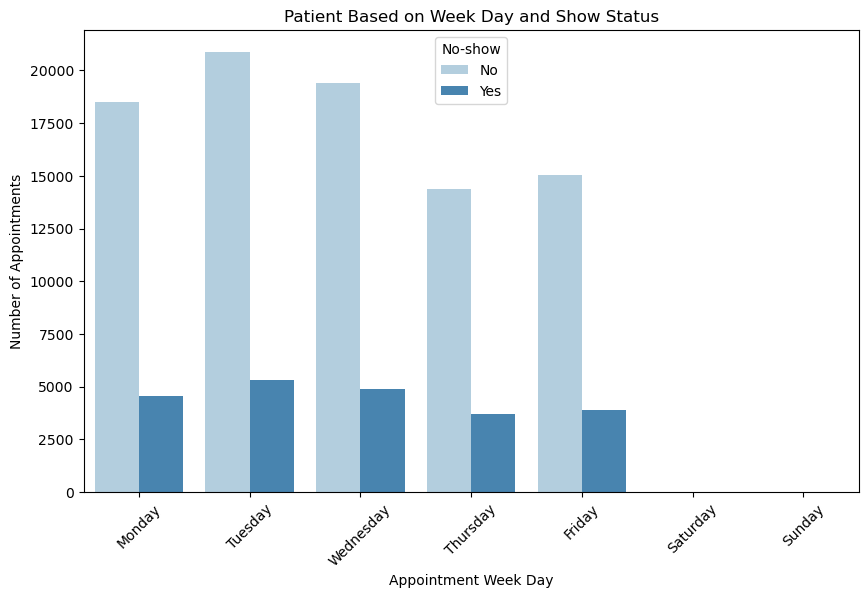

In [28]:
# Create a bar plot with a custom color palette
plt.figure(figsize=(10, 6))
sns.countplot(
    data=hospital_appointments, 
    x='DayOfWeek', 
    hue='No-show', 
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    palette='Blues'  # Use a color palette with shades of blue
)
plt.title('Patient Based on Week Day and Show Status')
plt.xlabel('Appointment Week Day')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.show()

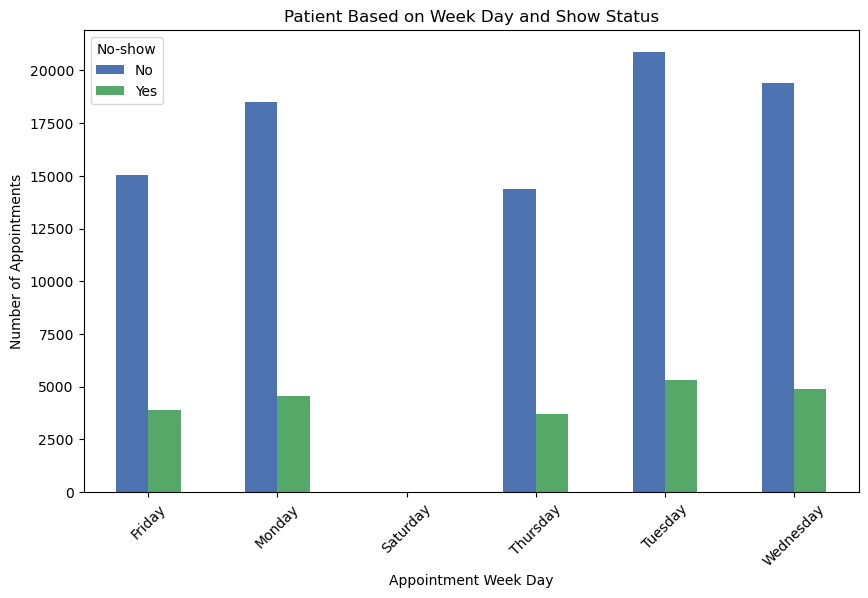

In [29]:
# Group by 'No-show' and 'DayOfWeek' and count the number of appointments
appointment_counts = hospital_appointments.groupby(['DayOfWeek', 'No-show']).size().unstack()

# Define custom colors
colors = ['#4c72b0', '#55a868']  # Different shades of blue and green

# Plot the grouped data as a bar plot with custom colors
appointment_counts.plot(kind='bar', figsize=(10, 6), color=colors)
plt.title('Patient Based on Week Day and Show Status')
plt.xlabel('Appointment Week Day')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.show()

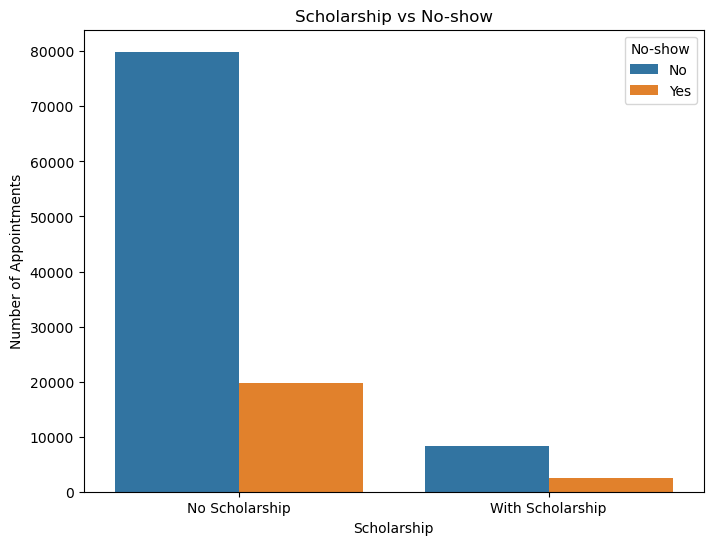

In [30]:
# 5. Scholarship Impact on Attendance
plt.figure(figsize=(8, 6))
sns.countplot(data=hospital_appointments, x='Scholarship', hue='No-show')
plt.title('Scholarship vs No-show')
plt.ylabel('Number of Appointments')
plt.xticks([0, 1], ['No Scholarship', 'With Scholarship'])
plt.show()


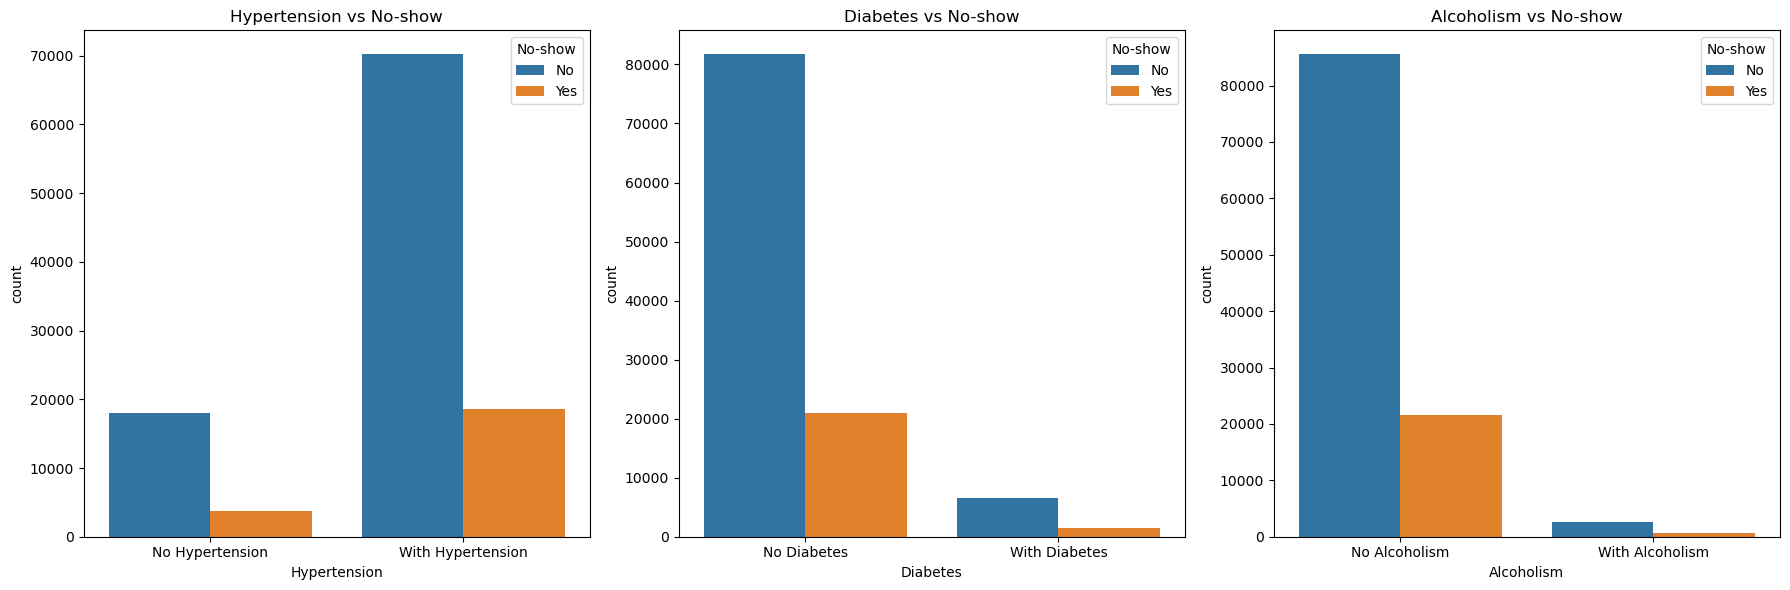

In [31]:

# 6. Hypertension, Diabetes, Alcoholism Impact on Attendance
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.countplot(data=hospital_appointments, x='Hypertension', hue='No-show', ax=axes[0])
axes[0].set_title('Hypertension vs No-show')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Hypertension', 'With Hypertension'])

sns.countplot(data=hospital_appointments, x='Diabetes', hue='No-show', ax=axes[1])
axes[1].set_title('Diabetes vs No-show')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Diabetes', 'With Diabetes'])

sns.countplot(data=hospital_appointments, x='Alcoholism', hue='No-show', ax=axes[2])
axes[2].set_title('Alcoholism vs No-show')
axes[2].set_xticks([0, 1])
axes[2].set_xticklabels(['No Alcoholism', 'With Alcoholism'])

plt.tight_layout()
plt.show()

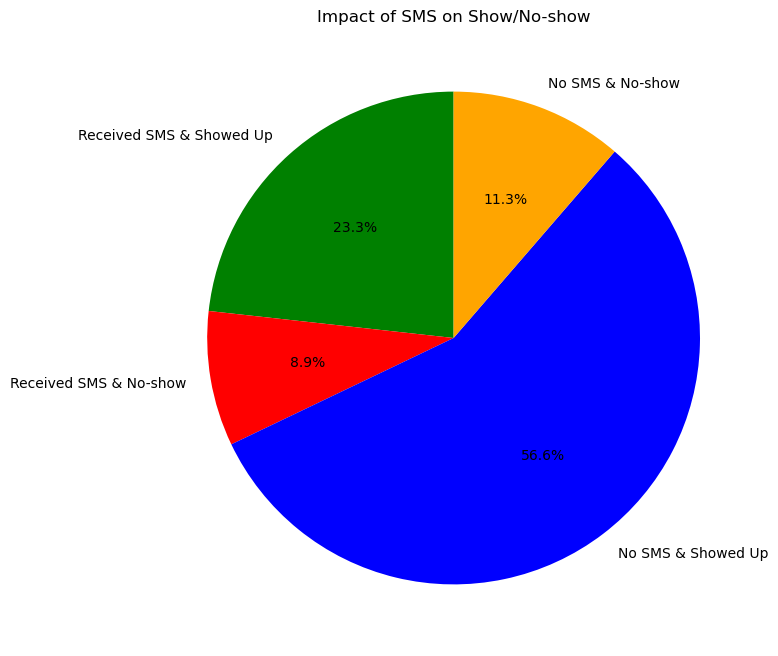

In [32]:
# Create a grouped data based on SMS_received and No-show status
sms_no_show_data = hospital_appointments.groupby(['SMS_received', 'No-show']).size().unstack()

# Prepare labels and data for the pie chart
labels = ['Received SMS & Showed Up', 'Received SMS & No-show', 'No SMS & Showed Up', 'No SMS & No-show']
data = [
    sms_no_show_data.loc['Yes', 'No'],  # Received SMS and showed up
    sms_no_show_data.loc['Yes', 'Yes'],  # Received SMS and no-show
    sms_no_show_data.loc['No', 'No'],  # Did not receive SMS and showed up
    sms_no_show_data.loc['No', 'Yes']  # Did not receive SMS and no-show
]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'blue', 'orange'])
plt.title('Impact of SMS on Show/No-show')
plt.show()